In [1]:
# Avocado analysis
# Metodos cuantitativos

In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
from scipy.stats import skew, kurtosis, anderson, pareto
import scipy.stats as st
import statsmodels.datasets
import seaborn as sn
import openturns as ot

In [39]:
avocado_data = pd.read_csv("data/avocado.csv")
avocado_data.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [60]:
def createHistogram(data):
    nbins = 10
    fig, ax = plt.subplots(1, 1, figsize=(6, 4))
    ax.hist(data, nbins)
    plt.hist(data)
    plt.xlabel("Number")
    plt.ylabel("Frequency")
    plt.show()

In [68]:
def adjustExp(data):
    smean = data.mean()
    rate = 1. / smean
    smax = data.max()
    days = np.linspace(0., smax, 1000)
    dt = smax / 999.
    dist_exp = st.expon.pdf(days, scale=1. / rate)
    nbins = 10
    fig, ax = plt.subplots(1, 1, figsize=(6, 4))
    ax.hist(data, nbins)
    ax.plot(days, dist_exp * len(data) * smax / 100, '-r', lw=3)
    ax.set_xlabel("Survival time (days)")
    ax.set_ylabel("Number of patients")
    plt.show()

In [6]:
def getAverage(data):
    return np.average(data)

In [7]:
def getVar(data):
    return np.var(data)

In [8]:
def getStDv(data):
    return np.std(data)

In [33]:
def getAnderson(data):
    result = anderson(data)
    print('Statistic: %.3f' % result.statistic)
    p = 0
    for i in range(len(result.critical_values)):
        sl, cv = result.significance_level[i], result.critical_values[i]
        if result.statistic < result.critical_values[i]:
            print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
        else:
            print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

In [53]:
def analyzeVar(idx_num):
    print("Variable analysis of", avocado_data.columns.values[idx_num])
    currVar = avocado_data.iloc[:, idx_num]
    createHistogram(currVar)
    avg = getAverage(currVar)
    var = getVar(currVar)
    stdV = getStDv(currVar)
    print("Average: ", avg)
    print("Variance: ", var)
    print("Standard deviation ", stdV)
    print("Symmetry : ",skew(currVar))
    print("Kurtosis : ",kurtosis(currVar))
    print("Anderson :")
    getAnderson(currVar)
    adjustExp(currVar)
    print('\n')

Variable analysis of Total Bags


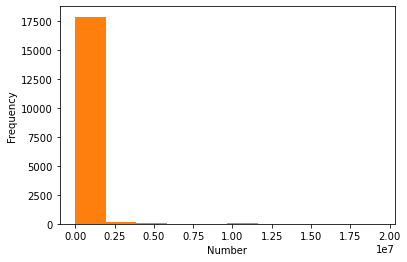

Average:  239639.20205983886
Variance:  972620769882.2756
Standard deviation  986215.3770258684
Symmetry :  9.755269739145234
Kurtosis :  112.24106888264194
Anderson :
Statistic: 4678.828
15.000: 0.576, data does not look normal (reject H0)
10.000: 0.656, data does not look normal (reject H0)
5.000: 0.787, data does not look normal (reject H0)
2.500: 0.918, data does not look normal (reject H0)
1.000: 1.092, data does not look normal (reject H0)


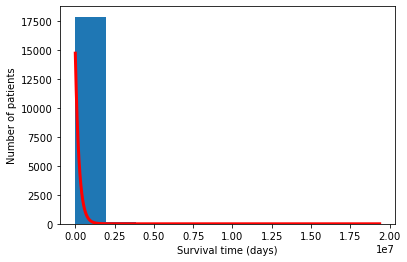



Variable analysis of AveragePrice


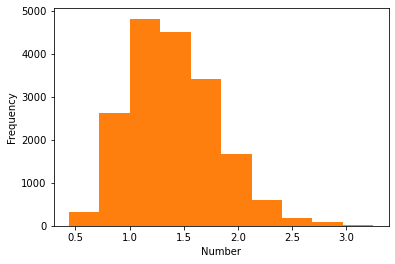

Average:  1.405978409775878
Variance:  0.16213952301460038
Standard deviation  0.40266552250546656
Symmetry :  0.5802550380696565
Kurtosis :  0.3247779907295181
Anderson :
Statistic: 79.331
15.000: 0.576, data does not look normal (reject H0)
10.000: 0.656, data does not look normal (reject H0)
5.000: 0.787, data does not look normal (reject H0)
2.500: 0.918, data does not look normal (reject H0)
1.000: 1.092, data does not look normal (reject H0)


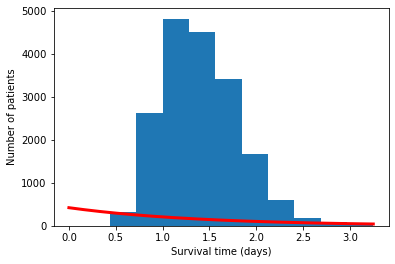



Variable analysis of Total Volume


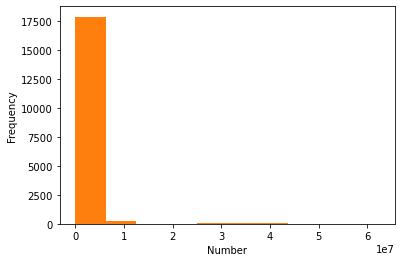

Average:  850644.0130089321
Variance:  11926321953084.043
Standard deviation  3453450.731237387
Symmetry :  9.006947063504116
Kurtosis :  92.07889546445338
Anderson :
Statistic: 4634.401
15.000: 0.576, data does not look normal (reject H0)
10.000: 0.656, data does not look normal (reject H0)
5.000: 0.787, data does not look normal (reject H0)
2.500: 0.918, data does not look normal (reject H0)
1.000: 1.092, data does not look normal (reject H0)


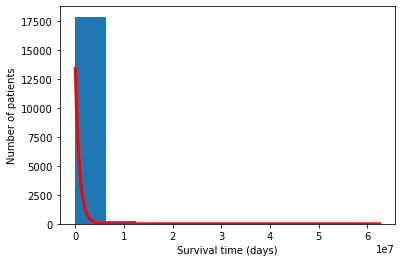



Variable analysis of Small Bags


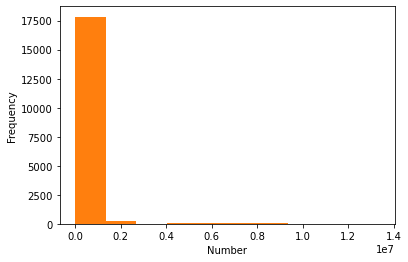

Average:  182194.68669570936
Variance:  556751865895.4261
Standard deviation  746158.0703144785
Symmetry :  9.539875757048327
Kurtosis :  106.9832384021082
Anderson :
Statistic: 4670.603
15.000: 0.576, data does not look normal (reject H0)
10.000: 0.656, data does not look normal (reject H0)
5.000: 0.787, data does not look normal (reject H0)
2.500: 0.918, data does not look normal (reject H0)
1.000: 1.092, data does not look normal (reject H0)


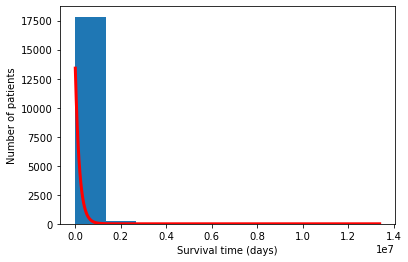

In [69]:
analyzeVar(7)
analyzeVar(2)
analyzeVar(3)
analyzeVar(8)

       Total Bags  AveragePrice  Total Volume  Small Bags
0         8696.87          1.33      64236.62     8603.62
1         9505.56          1.35      54876.98     9408.07
2         8145.35          0.93     118220.22     8042.21
3         5811.16          1.08      78992.15     5677.40
4         6183.95          1.28      51039.60     5986.26
...           ...           ...           ...         ...
18244    13498.67          1.63      17074.83    13066.82
18245     9264.84          1.71      13888.04     8940.04
18246     9394.11          1.87      13766.76     9351.80
18247    10969.54          1.93      16205.22    10919.54
18248    12014.15          1.62      17489.58    11988.14

[18249 rows x 4 columns]
              Total Bags  AveragePrice  Total Volume  Small Bags
Total Bags      1.000000     -0.177088      0.963047    0.994335
AveragePrice   -0.177088      1.000000     -0.192752   -0.174730
Total Volume    0.963047     -0.192752      1.000000    0.967238
Small Bags      0.

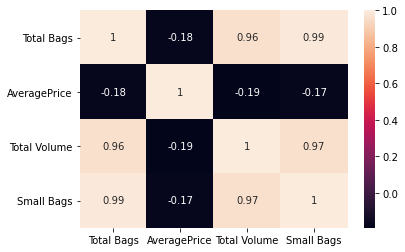

In [81]:
# Matriz de Correlacion
data = {avocado_data.columns.values[7]: avocado_data.iloc[:, 7],
       avocado_data.columns.values[2]: avocado_data.iloc[:, 2], 
       avocado_data.columns.values[3]: avocado_data.iloc[:, 3],
       avocado_data.columns.values[8]: avocado_data.iloc[:, 8], }
df = pd.DataFrame(data,columns=[avocado_data.columns.values[7],avocado_data.columns.values[2],avocado_data.columns.values[3], avocado_data.columns.values[8]])
print(df)
corrMatrix = df.corr()
print(corrMatrix)
sn.heatmap(corrMatrix, annot=True)
plt.show()

(array([7.30178555e-07, 9.82578376e-09, 6.55052250e-10, 1.59668986e-09,
        1.06445991e-09, 1.22822297e-09, 1.51480833e-09, 6.95993016e-10,
        2.45644594e-10, 1.22822297e-10]),
 array([       0.  ,  1338458.68,  2676917.36,  4015376.04,  5353834.72,
         6692293.4 ,  8030752.08,  9369210.76, 10707669.44, 12046128.12,
        13384586.8 ]),
 [<matplotlib.patches.Polygon at 0x7f8c50e9b0d0>])

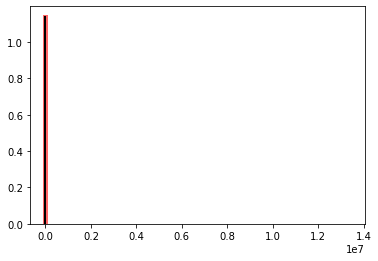

In [125]:
# Pareto
fig, ax = plt.subplots(1, 1)
b = 1.16
mean, var, skew, kurt = st.pareto.stats(b, moments='mvsk')
x = np.linspace(st.pareto.ppf(0.01, b), st.pareto.ppf(0.99, b), 100)
ax.plot(x, st.pareto.pdf(x, b),'r-', lw=5, alpha=0.6, label='pareto pdf')
rv = st.pareto(b)
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')
vals = st.pareto.ppf([0.001, 0.5, 0.999], b)
np.allclose([0.001, 0.5, 0.999], st.pareto.cdf(vals, b))
r =  avocado_data.iloc[:, 8]
ax.hist(r, density=True, histtype='stepfilled', alpha=0.2)

In [124]:
pareto_smp = pareto.rvs(1.16, size=1000)
D, p_value = scipy.stats.kstest(pareto_smp, avocado_data.iloc[:, 7])